In [20]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1

In [200]:
def new_shift(array,shift):
    N = array.size 
    k = np.arange(N)
    yft = np.fft.fft(array)
    
    dx = shift 
    
    y_shift = np.real(np.fft.ifft(yft*np.exp(-2*np.pi*1J*k*dx/N)))
    return y_shift

25.0


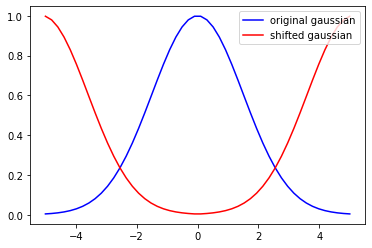

In [702]:
def gauss(pars,x):
    offset=pars[0]
    amp=pars[1]
    x0=pars[2]
    sig=pars[3]
    return offset+amp*np.exp(-0.5*(x-x0)**2/sig**2)

pars =[0,1,0,1.5]
x = np.linspace(-5,5)

print(x.shape[0]/2)
y = gauss(pars,x)
y_shift = new_shift(y,25)

fig = plt.figure() 
plt.plot(x,y,color='b',label='original gaussian')
plt.plot(x,y_shift,color='r', label='shifted gaussian')
plt.legend()
plt.show()

fig.savefig('gauss_shift',dpi=200)

## Problem 2

In [355]:
#%# Define the correlation function 

def corr(f,g):
    return np.real(np.fft.ifft(np.fft.fft(f) * np.conj(np.fft.fft(g))))

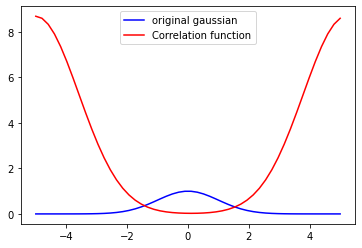

In [356]:
#%# Test correlation function of a gaussian with itself

def gauss(pars,x):
    offset=pars[0]
    amp=pars[1]
    x0=pars[2]
    sig=pars[3]
    return offset+amp*np.exp(-0.5*(x-x0)**2/sig**2)

pars =[0,1,0,1]
x = np.linspace(-5,5)

plt.plot(x,gauss(pars,x), color ='b', label='original gaussian')

gauss_corr = corr(gauss(pars,x),gauss(pars,x))
plt.plot(x,gauss_corr,color='r', label='Correlation function')
plt.legend()
plt.show()

## Problem 3

In [245]:
def corr_plus(x_array,shift):
    
    #make gauss with x value 
    gauss = np.exp(-0.5*(x_array)**2/1.5**2)
    
    #shift the gauss
    N = gauss.size 
    k = np.arange(N)
    yft = np.fft.fft(gauss)
    dx = shift 
    
    gauss_shift = np.real(np.fft.ifft(yft*np.exp(-2*np.pi*1J*k*dx/N)))

    # do the correlation of the shifted gaussian with itself
    gauss_corr = np.real(np.fft.ifft(np.fft.fft(gauss_shift) * np.conj(np.fft.fft(gauss_shift))))
    
    return gauss, gauss_corr
    

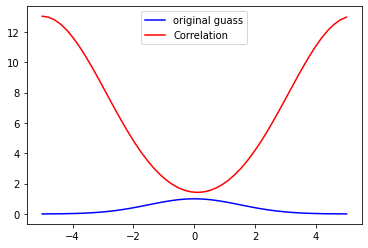

In [249]:
x = np.linspace(-5,5)
gauss,gauss_new = corr_plus(x,20)

plt.plot(x,gauss,color='b',label='original guass')
plt.plot(x,gauss_new, color='r', label='Correlation')
plt.legend()
plt.show()

The correlation function does not depend on the shift because it only depends on the number of points, not the the range of the points which is changing with the shift. 

## Problem 4

To avoid the wrap aorund we have to make sure that the linear convolution is the same as the circular convolution. For two arrays of size N x M if f has non-zero region of N$_1$ x M$_1$ and g has non_zero region of N$_2$ x M$_2$ we have to make sure that: 

$N_1 + N_2 -1 \leq N$

$M_1 + M_2 -1 \leq M$

For our arrays it will be safe to double the size of the largest one and pad the incoming two with zeros to that size. Since we are doing this with one dimensional arrays, only need to do this for the 0 axis shape of the array since the other dimension is one and obeys the above criteria.

In [347]:
def conv_safe(f,g):
    #f and g aren't neccessarily the same length 
    
    print('size of f:', f.size, 'size of g:', g.size)
    
    if f.size < g.size: 
        print('g is larger, final size double g')
        pad_f = np.zeros(2*g.size); pad_g = np.zeros(2*g.size)
        
    elif g.size < f.size: 
        print('f is larger, final size double f')
        pad_g = np.zeros(2*f.size); pad_f = np.zeros(2*f.size)
    
    elif g.size == f.size: 
        print('same size, final size double one input ')
        pad_g = np.zeros(2*g.size); pad_f = np.zeros(2*f.size)
        
    else: 
        print('Warning something went wrong')
        
    pad_g[:g.size] = g
    pad_f[:f.size] = f   
        
    conv = np.real(np.fft.ifft(np.fft.fft(pad_f) * np.fft.fft(pad_g)))
    print('Final size of convolution:',conv.size)
    return conv


size of f: 30 size of g: 20
f is larger, final size double f
Final size of convolution: 60


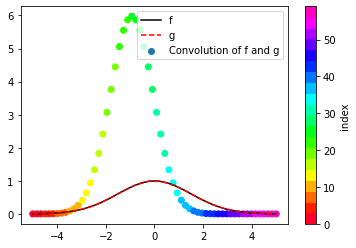

In [462]:
import matplotlib.cm as cm
from matplotlib.cm import get_cmap

def gauss(pars,x):
    offset=pars[0]
    amp=pars[1]
    x0=pars[2]
    sig=pars[3]
    return offset+amp*np.exp(-0.5*(x-x0)**2/sig**2)

pars =[0,1,0,1.5]

x = np.linspace(-5,5,30)
x2 = np.linspace(-5,5,20)

big_x = np.linspace(-5,5,2*x.size)

f = gauss(pars,x)
g = gauss(pars,x2) 

#should I have this step?
#f = f/f.sum()
#g = g/g.sum()

conv = conv_safe(f,g)

fig, ax= plt.subplots()
im = plt.scatter(big_x,conv,c=np.arange(conv.size), cmap = get_cmap('gist_rainbow',20),label='Convolution of f and g')
cb = plt.colorbar(im,ax=ax,orientation='vertical',label='index')
plt.plot(x,gauss(pars,x), color='k',label='f')
plt.plot(x2,gauss(pars,x2),linestyle='--',color='r',label='g')
plt.legend()
plt.show()



As seen above the convolution does not wrap around even for very large differences in the number of points in the input arrays. 

## Problem 5

### (a) 

For a geometric sum: 

$ \sum_{x=1}^{N} a r^{i-1}$

The sum can be writted as:

$\large S_N = \frac{a(1-r^N)}{1-r}$

We can re-write the given sum as a geometric sum: 

$\sum_{x=0}^{N-1}e^{-2 \pi i kx/N} = \sum_{x=1}^{N}(e^{-2 \pi i k/N})^{(x-1)}$

So we see that $a = 1$ and $r = e^{-2 \pi i k/N}$. So the sum is:

$\large S_N = \frac{1-e^{-2 \pi i k }}{1-e^{-2 \pi i k/N}}$

### (b)

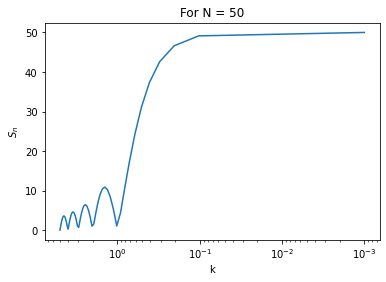

In [389]:
def func(k,N):
    return (np.e**(-2J*np.pi*k), np.e**((-2J*np.pi*k)/N))

k = np.linspace(5,0.001)
N = 50

f1,f2 = func(k,N)

s = (1-(f1))/(1-(f2))

plt.plot(k,np.abs(s))
#plt.plot(k,np.zeros(k.shape[0]))
plt.xscale('log')

plt.ylabel('$S_n$')
plt.xlabel('k')
plt.gca().invert_xaxis()
plt.title('For N = {}'.format(N))
plt.show()




Above I explore graphically the limit of the sum as k approaches 0, and we can see that the sum approaches the expected N value. If we pick a slightly lower value for N we can explore what happens for integer values of k and the difference between ones that are multiples of N. Below we can see the only values of the sum that are not 0 are the multiples of N ($10,20,30,40,50$ etc). 

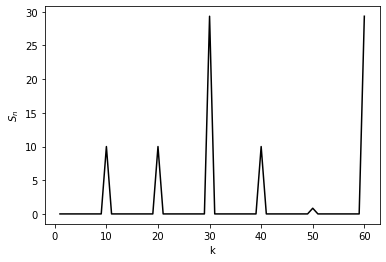

In [388]:
k = np.linspace(1,60,60)
N = 10

f1,f2 = func(k,N)

s = (1-f1)/(1-f2)

plt.plot(k,np.abs(s),'k')
plt.ylabel('$S_n$')
plt.xlabel('k')
plt.show()


### (c)

Analytically the DFT of a non-integer sine wave can be written as the following: 

Starting with the exponential form of sin: 

$ \sin(x) = \frac{1}{2i}[e^{(xi)} - e^{(-xi)} ]$

$ \sin(2 \pi k x/N) = \frac{1}{2i}[e^{(i2 \pi k x/N)} - e^{(-i2 \pi k x/N)} ]$

Combining this with the definition of DFT: 

$F(k) = \Sigma_{x=0}^{N-1}  \left(\frac{1}{2i}[e^{(-i2 \pi k' x/N)} - e^{(i2 \pi k' x/N)}]\right) \left(e^{(-i2 \pi k x/N)} \right) $

Notice the sign flip due to taking the dot product of the two vectors. This becomes: 

$F(k) = \Sigma_{x=0}^{N-1} \frac{1}{2i} \left[ e^{(-i2 \pi (k'+k) x/N)} -   e^{(-i2 \pi (k'-k) x/N)}       \right] =  \Sigma_{x=0}^{N-1} \frac{1}{2i} e^{(-i2 \pi (k'+k) x/N)} - \Sigma_{x=0}^{N-1} \frac{1}{2i}e^{(-i2 \pi (k'-k) x/N)} $

Using the closed form that we derived above we can re-write this as: 

$ S_N= \frac{1}{2i} \left[ \frac{1-e^{-2 \pi i (k'+ k) }}{1-e^{-2 \pi i (k'+k)/N}} - \frac{1-e^{-2 \pi i (k'- k) }}{1-e^{-2 \pi i (k'-k)/N}} \right]$

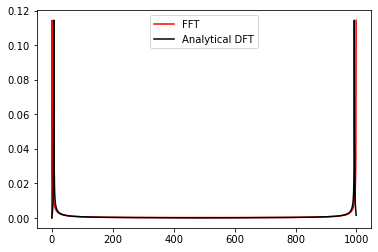

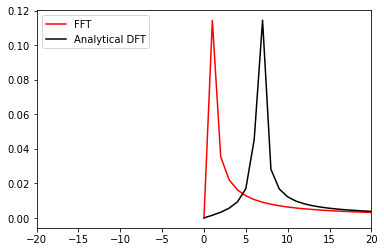

In [699]:
n_k = 6.7
N = 1000
k = np.linspace(-50,50,1000)

def sin_dft(k,N,n_k):
    # n_k is the non-integer k value associated with the sin function
    num_1 = 1 - np.e**(-2J*np.pi*(n_k + k))
    num_2 = 1 - np.e**(-2J*np.pi*(n_k - k))
    denom_1 = 1 - np.e**(-2J*np.pi*(n_k + k)/(N))
    denom_2 = 1 - np.e**(-2J*np.pi*(n_k - k)/(N))
    
    sum_n = 1/2J *((num_1/denom_1) - (num_2/denom_2))
    return sum_n

DFT =[]
#%# Convert spatial steps to wavenumbers
new_k = np.fft.fftfreq(k.size,1/N)
for i in new_k:
    DFT.append(sin_dft(i,N,n_k))
    
#%# Do the fast fourier transform of sin to compare 
def sin(x):
    N = len(x)
    return np.sin(2*n_k*np.pi*x/N)

x = np.linspace(-50,50,1000)
FFT = np.fft.fft(sin(x))


plt.plot(np.abs(FFT)/np.abs(FFT).sum(),color ='r',label='FFT')
plt.plot(np.abs(DFT)/np.abs(DFT).sum(),color ='k', label ='Analytical DFT')
plt.legend()
plt.show()

plt.plot(np.abs(FFT)/np.abs(FFT).sum(),color ='r',label='FFT')
plt.plot(np.abs(DFT)/np.abs(DFT).sum(),color ='k', label ='Analytical DFT')
plt.legend()
plt.xlim(-20,20)
plt.show()


Below I have a look at some of the residuals. I can see that the analytical DFT is still slightly shifted off of the FFT. The residual has a sinusoidal nature to it so I believe the issue is something with the number of points being off. 

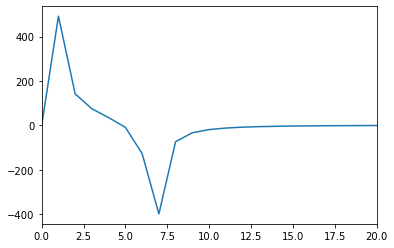

average of residuals: 0.5169742387857577


In [701]:
plt.plot(np.abs(FFT)- np.abs(DFT))
plt.xlim(0,20)
plt.show()

print('average of residuals:', np.mean(np.abs(FFT)- np.abs(DFT)))

## (d)

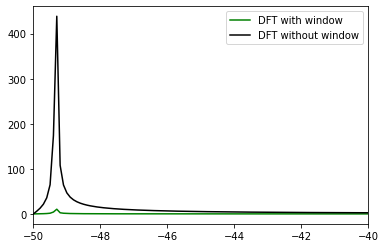

In [594]:
x = np.linspace(-50,50,1000)
N= 1000
n_k = 5.7

window = 0.5 - 0.5*np.cos(2*np.pi*x/N)
def sin(x):
    N = len(x)
    return np.sin(2*n_k*np.pi*x)
FFT = np.fft.fft(sin(x))

FFT_window = FFT*window

#plt.plot(x,np.abs(FFT_window),color='b',label='FFT with window')
#plt.plot(x,np.abs(FFT),color ='r', label='FFT without window')
plt.plot(k, np.abs(DFT*window),color='g',label='DFT with window')
plt.plot(k, np.abs(DFT),color='k',label='DFT without window')
plt.legend()
#plt.yscale('log')
plt.xlim(-50,-40)
plt.show()


## Problem 6


## (a) 

If we start with the following assumption that the correlation funciton is proportional to $c - |\delta|$: 

$ <f(x)f(x+\delta)> \propto c - |\delta|$

By Weiner's Thm the Fourier transform of the correlation function is the power spectrum. Thus if we take the Fourier Transform of the correlation function: 

$F(<f(x)f(x+\delta)>) = \Sigma_{x_0}^{N-1}(c - |\delta|) exp(-2\pi i xk/N)  $ 

$ F(<f(x)f(x+\delta)>) =  (c - |\delta|)\frac{1-e^{-2 \pi i k }}{1-e^{-2 \pi i k/N}} \propto 1/k^2$

## (b) 

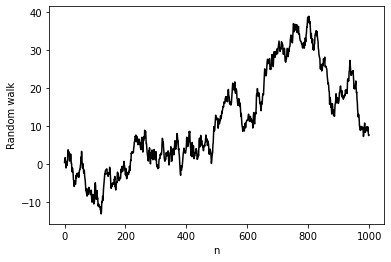

/Users/zoekearney/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


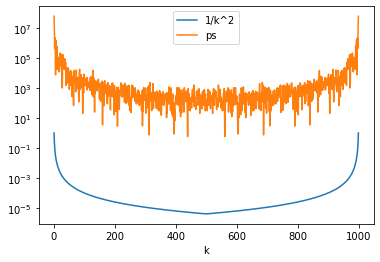

In [704]:
n = 1000
rw = np.cumsum(np.random.randn(n))
rw_freq = np.abs(np.fft.fftfreq(n,1/n))

#%# Plot the random walk
plt.plot(rw,color='k')
plt.xlabel('n')
plt.ylabel('Random walk')
plt.show()

#%# Plot the power spectrum by taking the Fourier Transform of the correlation function (Wiener Thm)

def corr(f,g):
    return np.real(np.fft.ifft(np.fft.fft(f) * np.conj(np.fft.fft(g))))

fig = plt.figure()
ps = np.fft.fft(corr(rw,rw))
plt.plot(1/(rw_freq[1:]**2),label='1/k^2')
plt.plot(ps[1:],label='ps')
plt.legend()
plt.yscale('log')
plt.xlabel('k')
plt.show()

fig.savefig('rw_ps.png')

Above we can see that the power spectrum follows the 1/k^2 shape, with a slight offset. 